#**The Face Mask Identifier - Machine Learning for Public Health**

#***Overview***

The science behind mask safety has certainly evolved since the onset of the pandemic. With the exception of the early months, masks have mostly been either recommended or required wear in public areas. As the mandates on mask-wearing continue to shift in the uncertain and fluctuating landscape of COVID-19, one aspect of the discussion is the proper and most effective way to wear a mask.

This topic is of increasing concern with the influx of more contagious variants, learned to be more airborn than previous versions of the virus. Data Scientists working in public health - particularly in environmental and/or epidemiological settings - often work collaboratively with professionals from other departments on projects to address issues like:

- clean water and/or air quality testing
- mother-child/infant adverse risk prevention
- lead paint poisoning
- infectious disease spread


#***PROPOSAL***

A machine-learning algorithm is being created that can detect & identify incorrect mask-wearing in New York City for indoor establishments. This detection product will be marketed to establishments as one that can be embedded into surveillance systems (e.g. camera devices, scanners) as part of the new "Keys to the City(all NYers having to be masked + show proof of vaccination)" program to assist with adhering to new COVID safety protocols; especially in high-infection areas, based on COVID tracking (DOHMH) data.

#***The Data***

The data for this project consisted of one zipped folder; inside of which three folders of image data exist(232_816_416 bytes). Each image folder is labeled for each class it belongs to, and holds roughly 3000 images;

- 3000 for "with_mask"
- 2994 "without_mask"
- 2994 "mask_weared_incorrect"

Many datasets on mask detection come imbalanced and uncleaned; however, this dataset was adjusted (from an original dataset) so that each class had a similar distribution of images and noisy images that could be considered outliers were removed. Below, you can find the original and cleaned datasets:

Original datasets:
- https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset
- https://www.kaggle.com/andrewmvd/face-mask-detection

Cleaned dataset:
- https://www.kaggle.com/vijaykumar1799/face-mask-detection

#***Methods***

**Initial Models**

For my research, I obtained a public dataset from Kaggle, "Face Mask Detection", which consisted of three classes of image data inside a zip file; one for correct mask wearers, one for non-mask wearers, and the other for incorrect mask wearers.

They were then written to one large csv file and downloaded to my local drive. This was for both ease of accessibility and analysis of the image data. The large dataset catalogued the categorized images. Before the model creation, I preprocessed the data, mounted my Drive, unzipped the data, then applied a preliminary visual check, such as checking the labels/classes, and that the images could be read; individually and in a list. I then split and trained the data. The data was split - into ratios .09/.05/.05 for training, testing, and validation - using ImageDataGenerator, then stored in a numpy array. After reshaping the image data, I proceeded to build a convolutional neural network(CNN) model using the Sequential API. 

I chose a CNN to build my model, as my specialization was in deep learning. Though the topic focused on the basics of artifical neural networks, further research explained that a simple CNN model could create better classification for image data. I created the current model with 16 layers using Conv2D, Batch normalization, Max Pooling, Dropout, Flatten and Dense layers.
- I began with a convolutional layer as the input layer, as this serves as the "feature map", whose information is fed to other layers to learn several other features of the input image
- A Batch normalization layer was used for the first hidden layer, to normalize the activations of the input volume before passing it into the next layer in the network...
   - followed by a pooling layer to also help reduce the spatial size of the input volume
- another round of layers were then added; with a convolutional layer, followed by a dropout layer to help prevent over-fitting, and a pooling layer
- this pattern is repeated three more times, twice increasing the neuron size
- a flattening layer was inserted to remove dimensionality and transform the input to 1D before transferring in to a Dense layer, where the neuron size is increased once more
- a final dropout layer is added before transferring it to the last layer, the output layer


For activation functions, I used ReLU, with the exception of the output layer, where softmax was used due to having its output being able to be read as probabilities in classification tasks.

The model was compiled using a fast optimizer, Adam, categorical crossentropy to minimize loss, and the accuracy metric to measure training performance, because it is a classification task and the dataset is balanced. The model was then trained using the fit() method.

The model was then evaluated using the evaluate() method of the model object to obtain the test set's accuracy using cross validation with KFolds, 5, to give the mean accuracy score of the value for the model. The recall, precision, and f1 scores were additionally checked to tell what portion of the values were correctly predicted, and which predictions were missed. I also used PyPlot line graphing and a box-and-whiskers plot to help visualize the results of the accuracy scores, and then finally, tested the model on a validation set before *creating it for deployment*



*Of note, I applied three versions of deep learning models with variations in layers and parameters, including this colab. The other two models' results are noted in the Results section.*

**Final Model**

After the model's performance and results were thoroughly compared with Model A and C, Model B was chosen to undergo further analysis for mask predictions. To do that, a final model was built.

Another CNN deep learning model with parameters similar to Model B was created on unseen data - the test set - then saved to an H5 file, using the `save()` method after installing the `h5py ibrary`. Similar steps were taken - loading the dataset, scaling and reshaping the data, then defining, compiling, fitting, and evaluating the model.

After this, a new image was loaded and seen if the algorithm could detect its class.

#**Results**


As noted in the previous section, I preemptively created three sets of models, with adjusted parameters for comparison. However, due to the configuration of the third model, it was unable to run successfully without repeated crashing on my local device; thus, the scores for the first two models are compared. The links to the other two models are at the bottom of the section. The other models were run a total of seven times, with the values being reported being the average.


- *Model Summaries:*
   - Model A:  9-layer CNN model
      - 2 convolutional layers, 1 dropout, 2 pooling layers, 2 Dense layers, 1 Batch normalization and flattening layer
      - 0.9695 training data, with 0.7958 test accuracy.
   - Model B:  16 -layer CNN model
      - 4 convolutional, dropout, and pooling layers, 2 Dense, 1 Batch normalization and flattening layer
      - same activation functions, zero-padding added
      - 0.9068 training data, with 0.8648 test accuracy.
   - Model C:  7-layer model
      - 1 convolutional, 5 Dense layers, and 1 flattening layer
      - due to the model(i.e. its layers) being extremely imbalanced and not having the layers necessary to handle the data, it repeatedly crashed and could not be run. It would have needed much more alteration e.g. batch normalization, more flattening, and the adding in of other layers, e.g. MaxPool, Conv2D that would have made it virtually identical to the other versions

 
- *Comparisons:*
   - Model A had a high training score, but a relatively lower test score, with a 0.174 difference between scores, which could indicate over-fitting
   - Model B had a lower training score, but a higher test score, with 0.0508 gap between sets 
   - Model B's increased test accuracy indicates that this model was better at learning from the data
   - Model A's high training score combined with a larger gap between the sets indicates that its data was fit well, making it less likely to be generalized to the test set 
   - the # of neurons were also adjusted(increased) in the second and third models; however, without the hidden layers to compensate for those adjustments and compute them appropriately in Model C, this quickly led to resource depletion. 
      - In Model B, two additional layers - another convolutional layer with the same neurons as the last one(128), and a dense layer with 256 neurons - were added to the model. Here
   - Though further evaluation will be discussed, it seems apparent that for initial accuracy, the deeper, more complex model had higher test accuracy and  as also less prone to over-fitting without causing errors.



- Model A
https://colab.research.google.com/drive/1FdSYQvMVT1ob2zSygl0zw8gvdO300B7_?usp=sharing
- Model B
https://colab.research.google.com/drive/100E-fDI_A4JKrtU8GbjLZQQ4iJ8dk4QD?usp=sharing
- Model C
https://colab.research.google.com/drive/11ZbNiQeUZn7aCKMIFRiP6YWuXjKSanG8?usp=sharing




- **Predictions**

Further analyses conducted on the model's ability to predict the class of images resulted similar results for both Models A and B(e.g. 81% precision, 78% recall for Model A, 79% recall for Model B). 

    Precision(.81), Recall(.78), f1(76)  - model A
    Precision(.81), Recall(.79), f1(.80) - model B


While this isn't the highest accuracy we were striving for, it highlights the point that initial model accuracy isn't the pinnacle of truth, while definitely leaving room for improvement! 



*Visualizations*


- The results were visualized after being defined. A single figure with two subplots - one for loss and one for accuracy - were created showing model performance on the train and test set during each fold of the k-fold cross-validation. Blue lines indicated model performance on the training dataset and green lines indicated performance on the test dataset. The code below created the plot given the collected training histories for both models:

```
# Loss and Accuracy Learning Curves During k-Fold Cross-Validation:

# plot loss
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
		
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.show()
```


  Model B generally achieved a good fit, with train and test learning curves converging. A validation set was then used to test the model's ability to predict images.



- For image prediction, validation data was then loaded and split up, using a for loop and accessing the data directories. Using the predict() method on the model object, another for loop was created to find if the model could predict the labels on new data.  

**Final Model**

For the Model B, the same formula was used (e.g. layers, activation functions, batch size) to create the final model as had been used on the initial model. After running the test harness, the classification accuracy averaged to 74.459. This was noticably lower than the initial model on the validation set, which had a training and test accuracy of 90.68 and 86.48, respectively.

Finally, the saved model was then loaded into an image prediction function, using the `predict()` method for the model object, in order for it to be able to predict mask detection. Running the example prints the class for the instance(as well as the class' that the image corresponds to). As can be seen, the model's algorithm successfully loaded and prepared the image, loaded the model, and then correctly identified that the loaded image represented a person "without mask" - class 2.

#***Discussion & Recommendation***



A closer look at the data indicates that a deeper model(at least 16 layers) with the power needed for multi-class image processing contributes to better test accuracy and performance.

Though the dataset was large enough for variability, drawbacks of the dataset were being pre-aggregated and not having fresh generation. Additionally, accuracy dropping on the test set indicated that a possibly larger dataset to train on might have garnered a better score. 

Though the models built were mildly successful at building a predictive deep learning model, improvements could be made in the model configuration that could result in the overall upgrade. One would be improving the learning algorithm, and the other would be increasing the depth of the model. 

Regarding the learning algorithm, there are a number of aspects that could be improved upon, namely aspects that could affect the rate of learning. Already mentioned previously was batch normalization. By standardizing the outputs, it both has the effects of changing the distribution of the output and stabilizing and accelerating the learning process. Model B, which has the most layers, initially did not have this layer/process, but added it after further research and consultation on its effects(also after the model had similar destabilizing returns as Model C. In addition to this, the images could have been converted to one-channel/grayscale images during the preprocessing phase, in order to reduce the weights of the model and make the process faster. This was not initially thought of due to the nature of the project, but was learned during the research and can be implemented in future iterations(before launch).

Increasing, or even exploring, the model depths and/or capacity is another way to conduct model improvement. This could be done in a similar pattern as Model B by initially adding on convolutional and pooling layers with the same number of neurons and adjusting the parameters(e.g. batch size, activation functions, padding), then gradually increasing the parameters, as well as the neurons. Layers can continue to be added on this way while observing the change(or no change) in scores. As the comparisons between Models B and A showed, adding complexity(in layers) to the model can add to the accuracy, as well.

**Data Installation:**

In [ ]:
!pip install -q kaggle

In [11]:
!pip install split-folders

In [ ]:
from google.colab import files 
files.upload() 

In [ ]:
#creating a kaggle folder/directory:

! mkdir ~/.kaggle 

In [ ]:
!touch ~/.kaggle/kaggle.json

In [ ]:
api_token = {"username":"mwarnsle1","key":"91702627b2baaab089b5771b2bbbd38a"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
 

In [ ]:
! kaggle datasets list

In [ ]:
#CHOOSING MY KAGGLE DATASET(API):

!kaggle datasets download -d vijaykumar1799/face-mask-detection --force 

In [4]:
import os 
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
print(keras.__version__)

2.6.0


**Mounting the Files:**

In [38]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
import zipfile

from PIL import Image

In [6]:
imgzip = zipfile.ZipFile("/content/gdrive/MyDrive/Thinkful projects/mask_images_dataset.zip")

imglist = imgzip.infolist()

In [ ]:
len(imglist)

8982

In [7]:
from matplotlib import image

loaded_images = []

*Image Check*

(128, 128, 3)


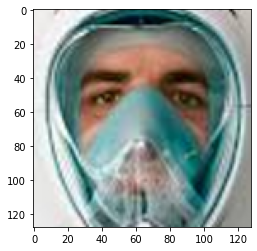

In [ ]:
file_path = r'/content/gdrive/MyDrive/Thinkful projects/mask_images_dataset/Dataset/with_mask/1.png'
img = plt.imread(file_path)
print (img.shape)
plt.imshow(img)

(128, 128, 3)


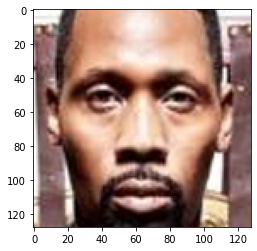

In [ ]:
file_path = r'/content/gdrive/MyDrive/Thinkful projects/mask_images_dataset/Dataset/without_mask/1.png'
img = plt.imread(file_path)
print (img.shape)
plt.imshow(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7F108850D390>


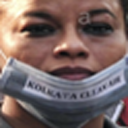

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7F1088474690>


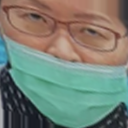

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7F1088474E90>


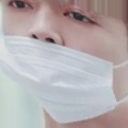

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7F108850D210>


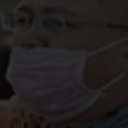

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7F1088481050>


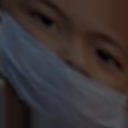

In [8]:
for f in imglist[:5]:
  ifile = imgzip.open(f)
  img = Image.open(ifile)
  print(img)
  display(img)

In [9]:
for f in imglist[:5]:
    ifile = imgzip.open(f)
    #img = Image.open(ifile)
    #print(img)
    #display(img)
    img_data = image.imread(ifile)  
    loaded_images.append(img_data)  

**Splitting & Training the Data**

In [12]:
import splitfolders

splitfolders.ratio("/content/gdrive/MyDrive/Thinkful projects/mask_images_dataset/Dataset", 
                   output = "./", 
                   seed = 1337, 
                   ratio = (0.9, 0.05, 0.05))

train_data_generator = keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True, 
                                                                    vertical_flip = True, 
                                                                    zoom_range = 0.1,
                                                                    shear_range = 0.1,
                                                                    width_shift_range = 0.2,
                                                                    height_shift_range = 0.2,
                                                                    rotation_range = 90,
                                                                    )
test_data_generator = keras.preprocessing.image.ImageDataGenerator()

Copying files: 8982 files [37:11,  4.02 files/s]


In [13]:
train_data = train_data_generator.flow_from_directory("./train", target_size = (128, 128), color_mode = "rgb", batch_size = 1, shuffle = True)

test_data = test_data_generator.flow_from_directory("./val", target_size = (128,128), color_mode = "rgb", batch_size = 1, shuffle = True)

Found 8082 images belonging to 3 classes.
Found 447 images belonging to 3 classes.


In [14]:
labels =  train_data.class_indices
labels

{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}

In [15]:
def get_array_from_datagen(train_generator):
  X = []
  y = []
  train_generator.reset()
  for i in range(train_generator.__len__()):
    a,b = train_generator.next()
    X.append(a)
    y.append(b)
  X = np.array(X, dtype = np.float32)
  y = np.array(y, dtype = np.float32)
  print(X.shape)
  print(y.shape)
  return X,y

X_train, y_train = get_array_from_datagen(train_data)
X_test, y_test = get_array_from_datagen(test_data)


(8082, 1, 128, 128, 3)
(8082, 1, 3)
(447, 1, 128, 128, 3)
(447, 1, 3)


In [16]:
X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)
y_train = y_train.reshape(-1, 3)
y_test = y_test.reshape(-1, 3)

**Define & Build the Model**

In [17]:
# define cnn model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#  model.add(Flatten())

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(3, activation="softmax"))

  


In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
# setting verbose=1 prints out some results after each epoch
history = model.fit(X_train, y_train, batch_size=10, validation_data=(X_test, y_test), epochs=20, verbose=1)

Epoch 1/20
809/809 [==============================] - 18s 23ms/step - loss: 0.3031 - accuracy: 0.8924 - val_loss: 0.3622 - val_accuracy: 0.8904
Epoch 2/20
809/809 [==============================] - 18s 22ms/step - loss: 0.2511 - accuracy: 0.9098 - val_loss: 0.3790 - val_accuracy: 0.8546
Epoch 3/20
809/809 [==============================] - 18s 22ms/step - loss: 0.2670 - accuracy: 0.9081 - val_loss: 0.4134 - val_accuracy: 0.8770
Epoch 4/20
809/809 [==============================] - 18s 22ms/step - loss: 0.2454 - accuracy: 0.9131 - val_loss: 0.4824 - val_accuracy: 0.8031
Epoch 5/20
809/809 [==============================] - 18s 22ms/step - loss: 0.2446 - accuracy: 0.9165 - val_loss: 0.4181 - val_accuracy: 0.8322
Epoch 6/20
809/809 [==============================] - 19s 23ms/step - loss: 0.2635 - accuracy: 0.9122 - val_loss: 0.4563 - val_accuracy: 0.8389
Epoch 7/20
809/809 [==============================] - 18s 23ms/step - loss: 0.2451 - accuracy: 0.9151 - val_loss: 0.3423 - val_accuracy:

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       7

**Evaluate the Model**

In [21]:
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)


score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.34314996004104614
Test accuracy: 0.8769574761390686


Checking the recall, precision and f1-score values:

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis = 1), model.predict(X_test).argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       149
           1       0.94      0.76      0.84       149
           2       0.93      0.91      0.92       149

    accuracy                           0.88       447
   macro avg       0.89      0.88      0.88       447
weighted avg       0.89      0.88      0.88       447



**Visualizing the Results:**

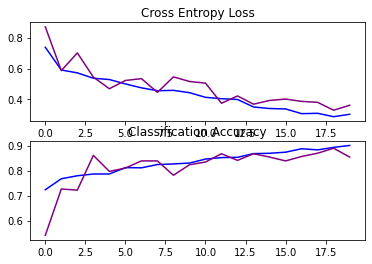

In [ ]:
#Loss and Accuracy Learning Curves for the Deeper Model During k-Fold Cross-Validation

# plot loss
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='purple', label='test')
	
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='purple', label='test')
plt.show()

Accuracy: mean=61.005 std=26.690, n=2


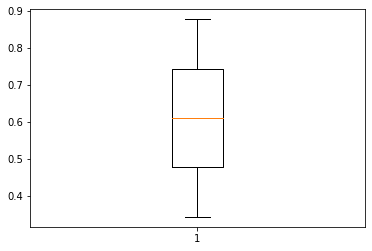

In [23]:
#Box and Whisker Plot of Accuracy Scores Evaluated Using k-Fold Cross-Validation

# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(score)*100, std(score)*100, len(score))) 

# box and whisker plots of results
plt.boxplot(score)
plt.show()

#**Testing Predictions:**

In [24]:
paths = []
names = []
k = 0


path = "./val/mask_weared_incorrect"
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("mask_weared_incorrect")
  image.imread(path + "/" + i, f"val/mask_weared_incorrect/{i}")
  k += 1
  if k == 8:
    break
k = 0
path = "./val/with_mask"
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("with_mask")
  image.imread(path + "/" + i, f"val/with_mask/{i}")
  k += 1
  if k == 8:
    break
path = "./val/without_mask"
k = 0
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("without_mask")
  image.imread(path + "/" + i,  f"val/without_mask/{i}")
  k += 1
  if k == 9:
    break


In [25]:
test_data_2 = test_data_generator.flow_from_directory("./val", target_size = (128,128), batch_size = 1, shuffle = False)

Found 447 images belonging to 3 classes.


In [26]:
print(labels)
labels_2 = {}
for k,v in labels.items():
    labels_2[v] = k
labels_2

{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}


{0: 'mask_weared_incorrect', 1: 'with_mask', 2: 'without_mask'}

In [27]:
predictions = model.predict(test_data_2).argmax(axis = 1) 
pred_label = []
for i in predictions:
    pred_label.append(labels_2[i])
pred_label

['mask_weared_incorrect',
 'with_mask',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'with_mask',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'mask_wea

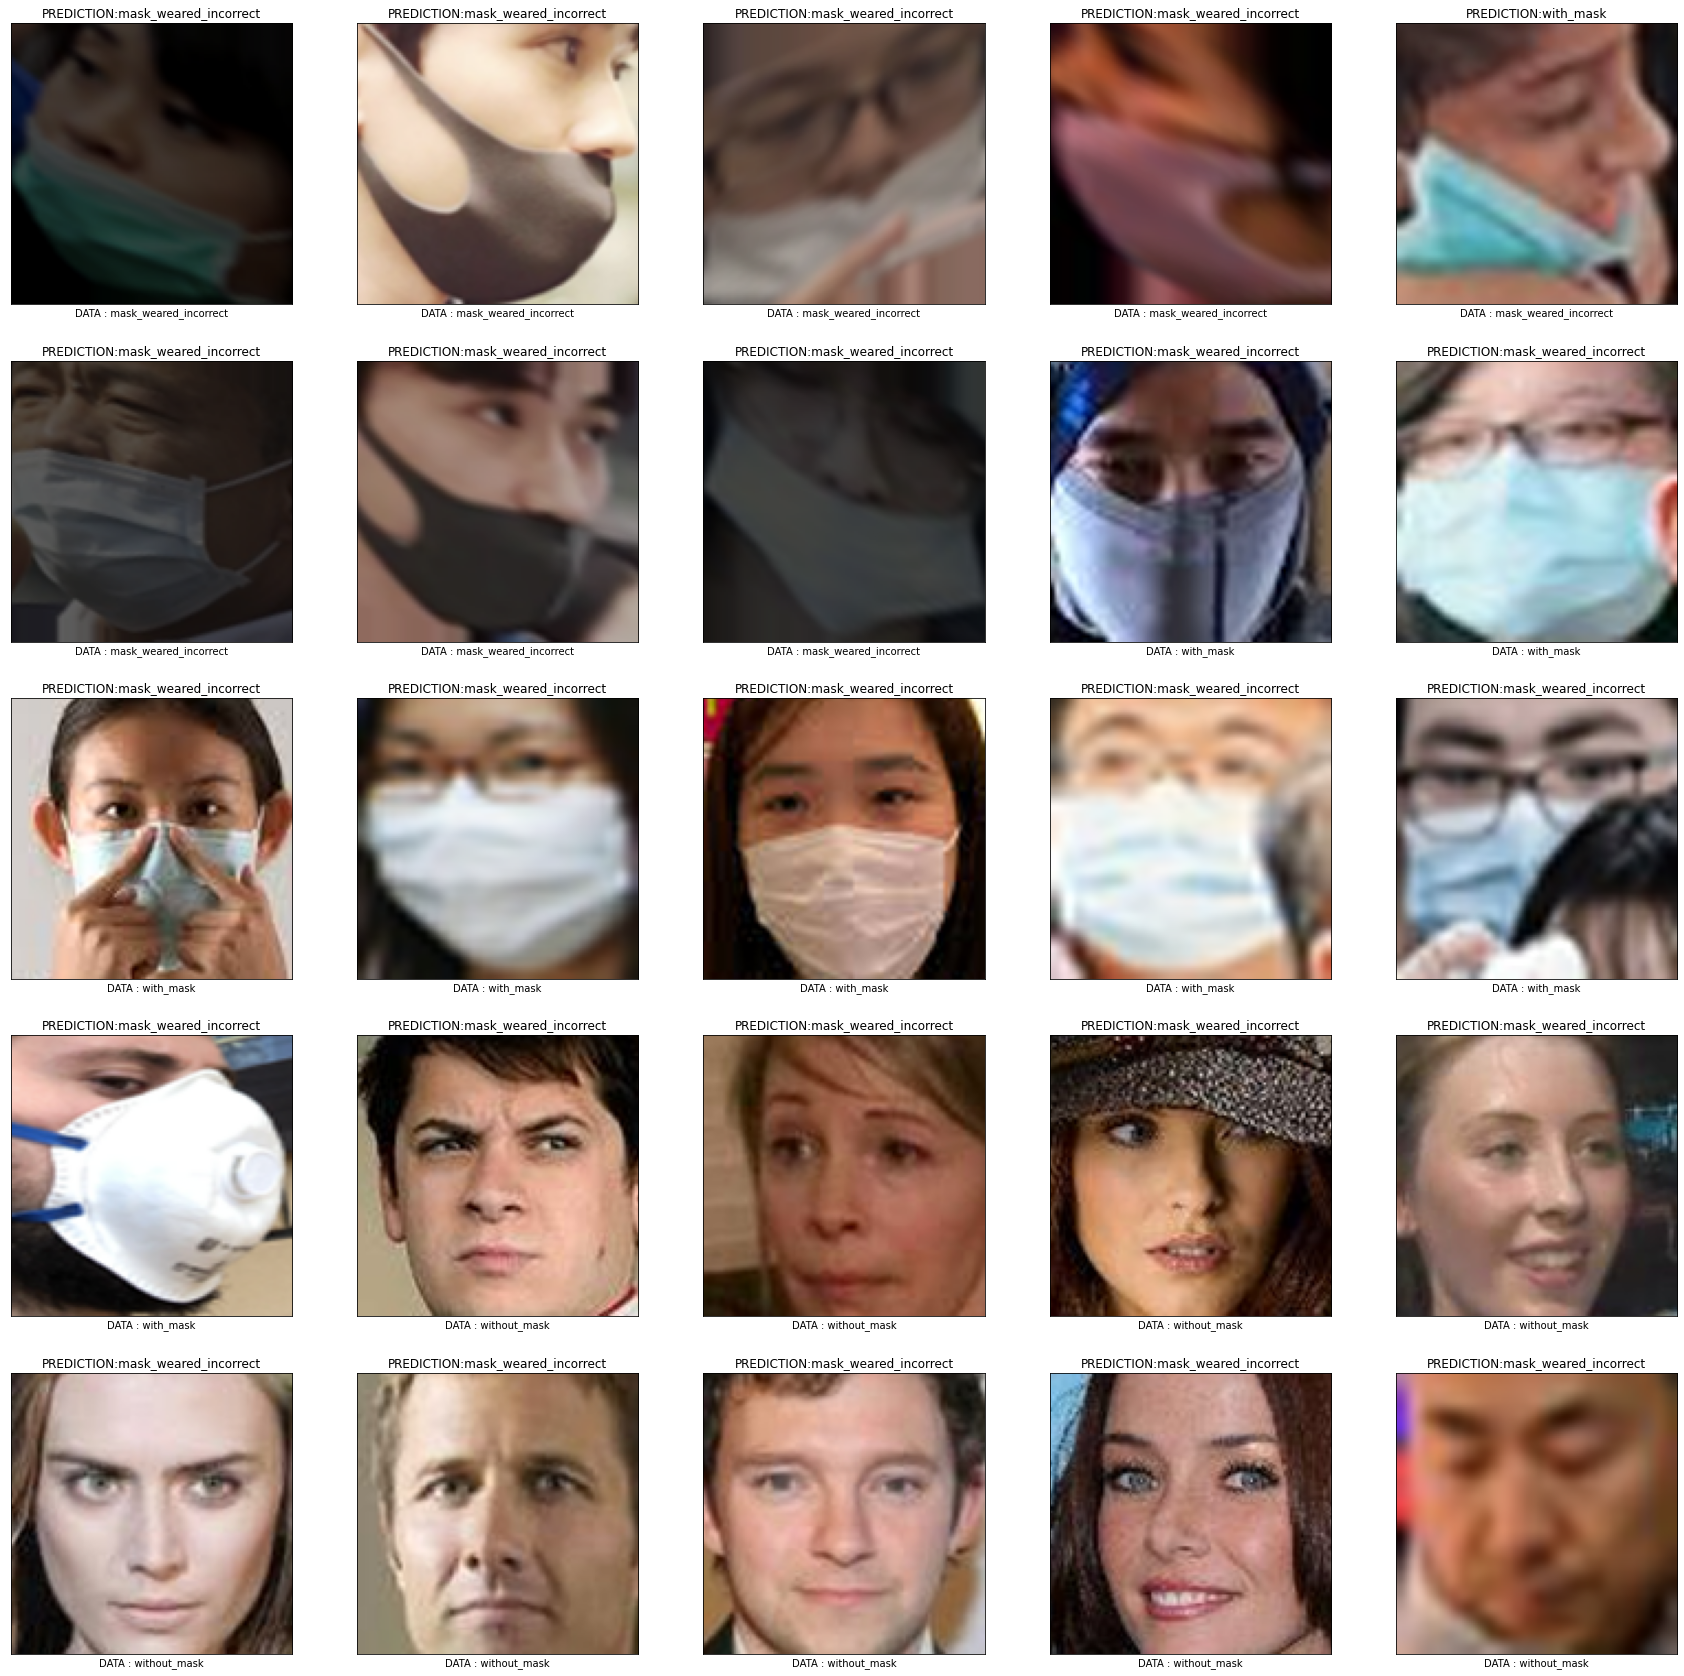

In [ ]:
#Prediction of 25 random images:

import os
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(30, 30),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(paths[i]))
    ax.set_title(f"PREDICTION:{pred_label[i]}")
    ax.set_xlabel(f"DATA : {names[i]}")
#plt.tight_layout()
plt.show()

**Saving Final Model:**

In [28]:
!sudo pip install h5py

In [29]:
paths = []
names = []
k = 0


path = "./test/mask_weared_incorrect"
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("mask_weared_incorrect")
  image.imread(path + "/" + i, f"test/mask_weared_incorrect/{i}")
  k += 1
  if k == 8:
    break
k = 0
path = "./test/with_mask"
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("with_mask")
  image.imread(path + "/" + i, f"test/with_mask/{i}")
  k += 1
  if k == 8:
    break
path = "./test/without_mask"
k = 0
for i in os.listdir(path):
  paths.append(path + "/" + i)
  names.append("without_mask")
  image.imread(path + "/" + i,  f"test/without_mask/{i}")
  k += 1
  if k == 9:
    break


In [30]:
test_data_final = test_data_generator.flow_from_directory("./val", target_size = (128,128), batch_size = 128, shuffle = False)

Found 447 images belonging to 3 classes.


In [31]:
# save the final model to file

def load_dataset():
  #load dataset
  test_data = train_data_generator.flow_from_directory("./test", target_size = (128, 128), batch_size = 128, shuffle = True)

  return load_dataset()
  


def get_array_from_datagen(train_generator):
  X = []
  y = []
  train_generator.reset()
  for i in range(train_generator.__len__()):
    a,b = train_generator.next()
    X.append(a)
    y.append(b)
  X = np.array(X, dtype = np.float32)
  y = np.array(y, dtype = np.float32)
  print(X.shape)
  print(y.shape)
  
  return X,y

X_train, y_train = get_array_from_datagen(test_data)
X_test, y_test = get_array_from_datagen(test_data)


  

(447, 1, 128, 128, 3)
(447, 1, 3)
(447, 1, 128, 128, 3)
(447, 1, 3)


In [32]:
# reshape dataset:

X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)
y_train = y_train.reshape(-1, 3)
y_test = y_test.reshape(-1, 3)

In [33]:
  # define cnn model
def define_model():

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128,(3,3), padding='same', activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128,(3,3), padding='same', activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(3, activation="softmax"))
    
    #compile model
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model




In [34]:
# run the test harness for evaluating a model
def run_test_harness():

  # load dataset
  test_data = train_data_generator.flow_from_directory("./test", target_size = (128, 128), batch_size = 1, shuffle = True)

  #prepare pixel data
  X_train, y_train = get_array_from_datagen(test_data)
  X_test, y_test = get_array_from_datagen(test_data)

  # reshape dataset
  X_train = X_train.reshape(-1, 128, 128, 3)
  X_test = X_test.reshape(-1, 128, 128, 3)
  y_train = y_train.reshape(-1, 3)
  y_test = y_test.reshape(-1, 3)
  

  #define model
  model = define_model()

  #fit model
  model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)

  #save model
  model.save('final_model.h5')

  #evaluate model on test dataset:
  _, acc = model.evaluate(X_test, y_test, verbose=0)
  print('> %.3f' % (acc * 100.0))

#entry point, run the test harness
run_test_harness()

Found 453 images belonging to 3 classes.
(453, 1, 128, 128, 3)
(453, 1, 3)
(453, 1, 128, 128, 3)
(453, 1, 3)
> 76.159


**Evaluating on Saved Images:**

Testing Predictions on Validation set:

In [36]:
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(128, 128))
 
	# convert to array & prepare pixel data
	img = np.array(img, dtype = np.float32)
 
	# reshape
	img = img.reshape(-1, 128, 128, 3)
 
	return img

In [40]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

probability_model = load_model('final_model.h5')

img = load_image('/content/gdrive/MyDrive/Thinkful projects/mask_images_dataset/Dataset/without_mask/1000.png')
 
predictions = probability_model.predict(img)




#run_example()

In [41]:
predictions[0]

array([0.06975725, 0.05847229, 0.8717705 ], dtype=float32)

In [44]:
np.argmax(predictions[0])

2